In [6]:
import cv2
# from GPS_Navigation.bot_localization import bot_localizer
# from GPS_Navigation.bot_mapping import bot_mapper

from lib.bot_localization import bot_localizer
from lib.bot_mapping import bot_mapper
import matplotlib.pyplot as plt
bot_loc = bot_localizer()
bot_map = bot_mapper()

In [ ]:
# !pip install matplotlib
# !pip install opencv-contrib-python --upgrade

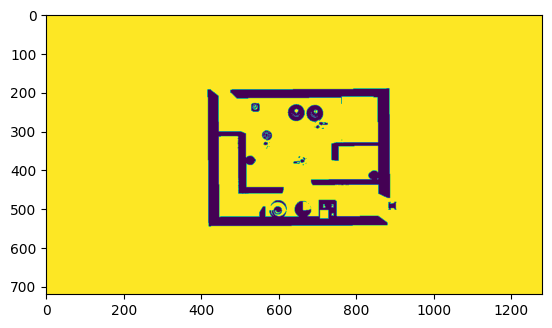

In [7]:
image_rbg = cv2.imread("/home/hero/Downloads/mini_sim20_ws/src/control_car_like/control_car_like/data/img_upper_camera.png")
image_gray = cv2.cvtColor(image_rbg, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

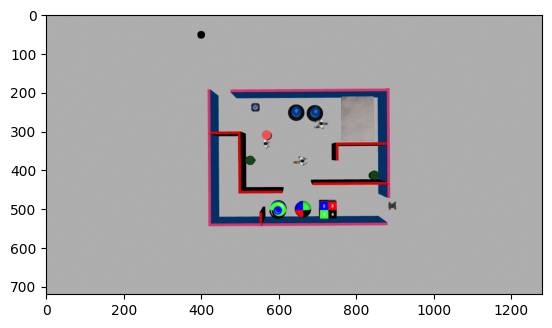

: 

In [9]:
# bot_loc.localize_bot(image_rbg,image_rbg)

# # thinned = cv2.ximgproc.thinning(thresh)
# # plt.imshow(thinned)
# # plt.show()
# # bot_loc.extract_bg(image_rbg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
frame = cv2.circle(image_rbg, (400,53),10,(0,0,0,),-1)
plt.imshow(frame)
plt.show()


In [ ]:
# bot_map.graphify(thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# import rclpy
# from rclpy.node import Node
# from geometry_msgs.msg import Twist
# from cv_bridge import CvBridge
# from sensor_msgs.msg import Image
# import cv2
# from math import pi,cos,sin
# import numpy as np
# from .lib.bot_localization import bot_localizer
# import requests, torch, math, cv2
# from .yolov6.utils.events import LOGGER, load_yaml
# from .yolov6.layers.common import DetectBackend
# from .yolov6.data.data_augment import letterbox
# from .utils import visualization as vis
# from .tracker.multitracker_plus import JDETracker
# from .utils.timer import Timer
# from .utils.log import logger
# from numpy import random



# class maze_solver(Node):

#     def __init__(self):
        
#         super().__init__("control_car")
        
#         self.device:str = "cpu"#@param ["gpu", "cpu"]
#         self.half:bool = False #@param {type:"boolean"}
#         self.cuda = self.device != 'cpu' and torch.cuda.is_available()
#         self.device = torch.device('cuda:0' if self.cuda else 'cpu')
#         self.conf_thres: float = .25  # @param {type:"number"}
#         self.iou_thres: float = .45  # @param {type:"number"}
#         self.max_det: int = 1000  # @param {type:"integer"}
#         self.agnostic_nms: bool = False  # @param {type:"boolean"}
#         # unique_track_color: bool = False
#         # thickness: int = 2
#         self.min_box_area: int = 50
#         self.track_buffer = 10
#         self.classes=None

#         self.frame_rate = 15
#         # class_names = load_yaml("./data/coco.yaml")['names']
#         self.model = DetectBackend(f"/home/hero/Downloads/mini_sim20_ws/src/control_car_like/control_car_like/data/yolov6n.pt", device=self.device)

#         self.stride = self.model.stride
#         self.tracker = JDETracker(self.model, self.conf_thres, self.track_buffer, frame_rate=self.frame_rate)
#         self.timer = Timer()
#         self.results = []
#         self.frame_id = 0
#         self.img_size = 320

#         self.velocity_publisher = self.create_publisher(Twist,'/cmd_vel',10)
#         self.videofeed_subscriber = self.create_subscription(Image,'/upper_camera/image_raw',self.get_video_feed_cb,10)
#         self.bot_subscriber = self.create_subscription(Image,'/camera_red/image_raw',self.process_data_bot,10)
#         self.timer_period = 0.5;self.timer = self.create_timer(self.timer_period, self.send_cmd_vel)

#         self.bridge = CvBridge()
#         self.vel_msg = Twist()
#         # self.bot_localizer = bot_localizer()
#         self.sat_view = []

#     def send_cmd_vel(self):
#         self.velocity_publisher.publish(self.vel_msg)
    
#     def precess_image(self, img_src):

#         image = letterbox(img_src, 320, stride=self.stride)[0]
#         # Convert
#         image = image.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
#         image = torch.from_numpy(np.ascontiguousarray(image))
#         image = image.float()  # uint8 to fp16/32
#         image /= 255  # 0 - 255 to 0.0 - 1.0

#         return image, img_src

#     def get_video_feed_cb(self,data):
#         frame = self.bridge.imgmsg_to_cv2(data,'bgr8')
#         self.sat_view = frame
#         # self.bot_localizer.localize_bot(self.sat_view, frame)
#         # cv2.imshow("Sat_view",frame)
#         cv2.imwrite("img_upper_camera.png", frame)
#         # cv2.waitKey(1)
    
#     def process_data_bot(self, data):
#         self.bot_view = self.bridge.imgmsg_to_cv2(data,'bgr8') # performing conversion

#         img, img_src = self.precess_image(self.bot_view)
#         # self.timer.tic()
#         img = img.to(self.device)
#         # blob = torch.from_numpy(img).cuda().unsqueeze(0)
#         if len(img.shape) == 3:
#             img = img[None]
#         blob = img
#         online_targets = self.tracker.update(blob, img_src, self.iou_thres,self.classes,self.agnostic_nms,self.max_det)
#         online_tlwhs = []
#         online_ids = []
#         for t in online_targets:
#             tlwh = t.tlwh
#             tid = t.track_id
#             vertical = tlwh[2] / tlwh[3] > 1.6
#             if tlwh[2] * tlwh[3] > self.min_box_area and not vertical:
#                 online_tlwhs.append(tlwh)
#                 online_ids.append(tid)
#         # self.timer.toc()
#         # save results
#         self.results.append((self.frame_id + 1, online_tlwhs, online_ids))
#         # if show_image or save_dir is not None:
#         online_im = vis.plot_tracking(img_src, online_tlwhs, online_ids, frame_id=self.frame_id,
#                                             fps=0)

#         cv2.imshow("Bot_view",online_im)
#         cv2.waitKey(1)

# def main(args =None):
#     rclpy.init()
#     node_obj =maze_solver()
#     rclpy.spin(node_obj)
#     rclpy.shutdown()


# if __name__ == '__main__':
#     main()